# Part II - (Fordgo Bike System)
## by(Umar Baba Umar)





## Investigation Overview
This is a dataset of total 183412 rows and 16 columns.Looking at the dataset,there were missing values in gender and birth year ,so I had to fill them with Nan value.
Looking the member_birth year column,there were records of users that most have been dead because of the age duration. it was necccassary to get the percentile of the member age.
I then changed the datatypes to appropriate types.
I addesd new columns of start_time_hour,Start_time_weekday and Start_time_month




 


## Dataset Overview

> The dataset is a fordgp bike share dataset.Here users can rent bikes.It contains information of users icluding their age,gender user type etc

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# change the data type for start and end time to be datetime64[ns] 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [5]:
# change the data type for bike_share_for_all_trip to be bool
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)
Most users are subscribers

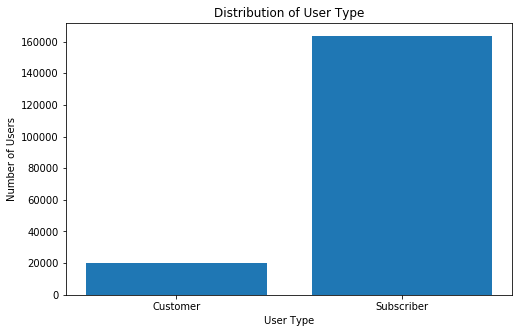

In [6]:
# plotting types of users 
plt.figure(figsize=[8,5])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

## (Visualization 2)

> most users are of young age

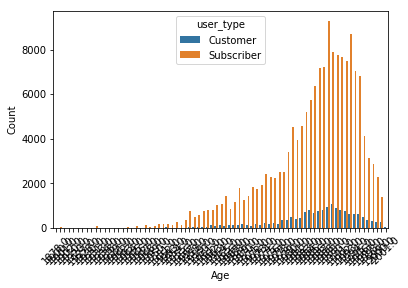

In [11]:
sb.countplot(data=df, x='member_birth_year', hue='user_type');
plt.xticks(rotation=45)
plt.xlabel('Age');
plt.ylabel('Count');

## (Visualization 3)



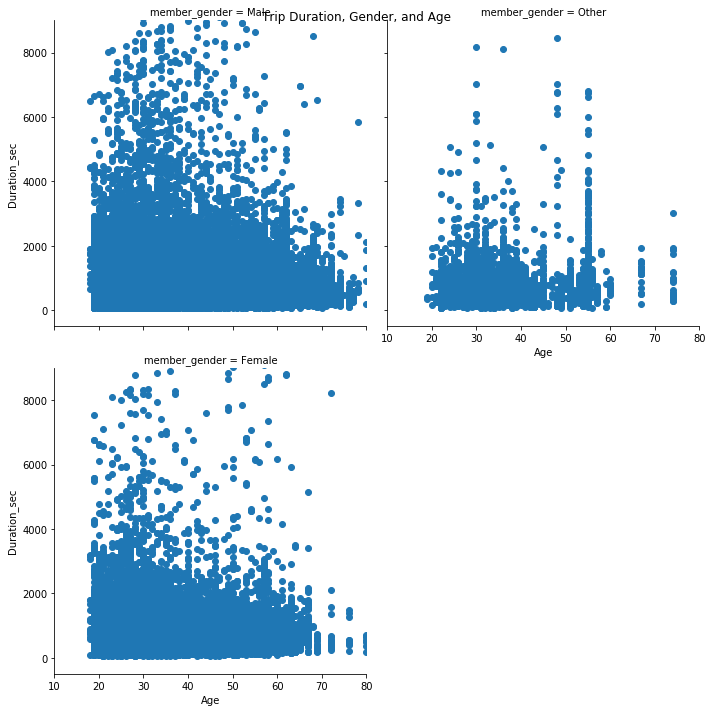

In [8]:
df['age'] = (2019 - df['member_birth_year'])
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'age', 'duration_sec', alpha= 1)

gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
gender.fig.suptitle('Trip Duration, Gender, and Age')

plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [14]:

!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 478, in convert_single_notebook
    output, resources = self.export_single_notebook(notebook_filename, resources, input_buffer=input_buff

In [11]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_slide_deck_template>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_slide_deck_template: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
